In [64]:
import pyod

In [65]:
contamination = 0.1

In [66]:
data = pyod.utils.data.generate_data(n_train=400, n_test=100, contamination=contamination, n_features=2, random_state=42)

In [67]:
X_train, X_test, y_train, y_test = data

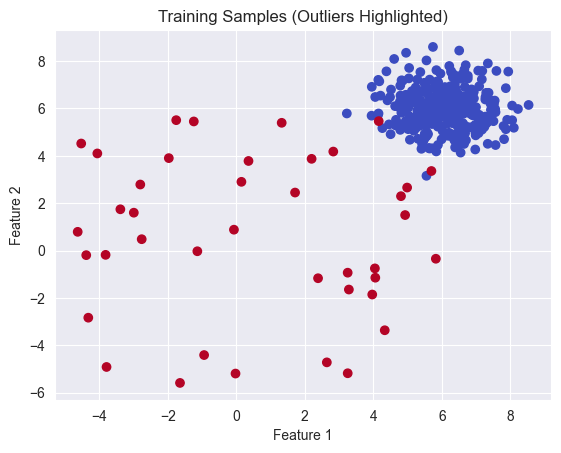

In [68]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Samples (Outliers Highlighted)')
plt.show()

In [69]:
# use pyod KNN model
from pyod.models.knn import KNN
model = KNN(contamination=0.1)
model.fit(X_train)
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

Confusion Matrix:
 [[90  0]
 [ 1  9]]


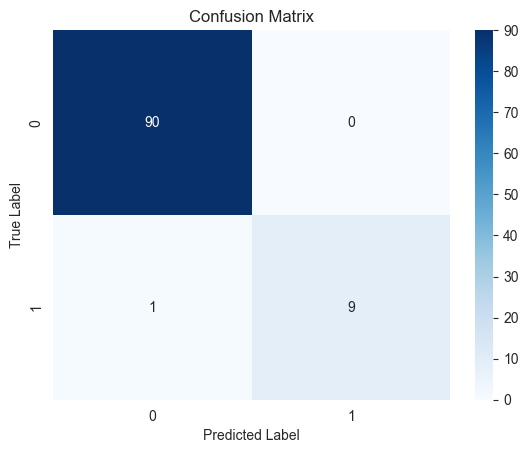

In [70]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions_test)
print("Confusion Matrix:\n", cm)
# plot confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [71]:
TP = cm[0, 0]
TN = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]

In [72]:
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
BA = (TPR + TNR) / 2
print(f"True Positive Rate (TPR): {TPR:.2f}")
print(f"True Negative Rate (TNR): {TNR:.2f}")
print(f"Balanced Accuracy (BA): {BA:.2f}")

True Positive Rate (TPR): 0.99
True Negative Rate (TNR): 1.00
Balanced Accuracy (BA): 0.99


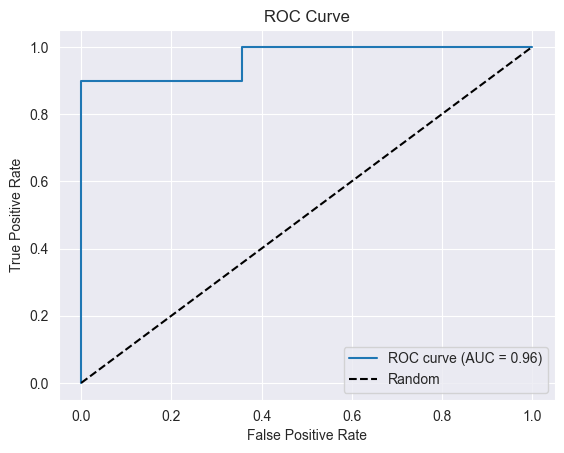

In [73]:
# Python
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get decision scores for test set
scores_test = model.decision_function(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, scores_test)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [74]:
data2 = pyod.utils.data.generate_data(n_train=1000, n_test=0, contamination=0.1, n_features=1)

In [75]:
import numpy as np
mean = np.mean(data2[0])
std = np.std(data2[0])
z_scores = np.abs((data2[0] - mean)) / std
z_scores = z_scores.flatten()
z_scores

array([1.42610387e+00, 2.47722017e+00, 9.48938686e-01, 1.42210998e+00,
       1.62060735e+00, 3.68034012e-01, 1.25918459e+00, 1.53667753e-01,
       7.14365632e-01, 2.01660483e+00, 7.07109567e-01, 1.63037959e+00,
       4.12206510e-01, 4.07550177e-01, 1.35678678e+00, 1.33841327e+00,
       1.58307351e+00, 8.35464399e-01, 3.66141423e-01, 1.70458956e+00,
       1.08594445e+00, 1.83380677e+00, 6.22538817e-01, 2.60320885e-01,
       1.14090786e+00, 3.49704004e-01, 2.35138015e-01, 1.06151479e+00,
       4.93472914e-01, 8.82117042e-01, 3.80363450e-01, 1.88990021e+00,
       1.49029129e+00, 1.88663549e+00, 2.55920087e-01, 1.35949464e+00,
       6.67997961e-01, 1.76759062e+00, 9.60046809e-01, 1.57231888e+00,
       1.54427656e-01, 2.10069767e+00, 2.28535645e+00, 1.60019508e+00,
       1.61704616e+00, 2.35151584e+00, 1.05804917e+00, 6.28177853e-02,
       9.62037397e-02, 1.17986506e+00, 1.36290217e+00, 6.25434012e-02,
       1.43579498e+00, 1.06701529e+00, 8.68515437e-01, 1.00444958e-01,
      

In [76]:
from sklearn.metrics import balanced_accuracy_score

threshold = np.quantile(z_scores, 0.9)
predictions = (z_scores > threshold).astype(int)

_, _, y_train, _ = data2
# 5. Compute balanced accuracy
ba = balanced_accuracy_score(y_train, predictions)
print(f"Balanced Accuracy: {ba:.2f}")

Balanced Accuracy: 0.44


[5.2559895  2.77620755 6.48798777 3.31139288 6.10927934]
[[2.17470464 2.09764852 1.77228858 0.70683389 2.27568657]
 [2.09764852 2.26074663 1.72739283 0.66152429 2.41465912]
 [1.77228858 1.72739283 1.83506035 0.67521635 2.00087286]
 [0.70683389 0.66152429 0.67521635 0.31911626 0.88921215]
 [2.27568657 2.41465912 2.00087286 0.88921215 3.04271748]]


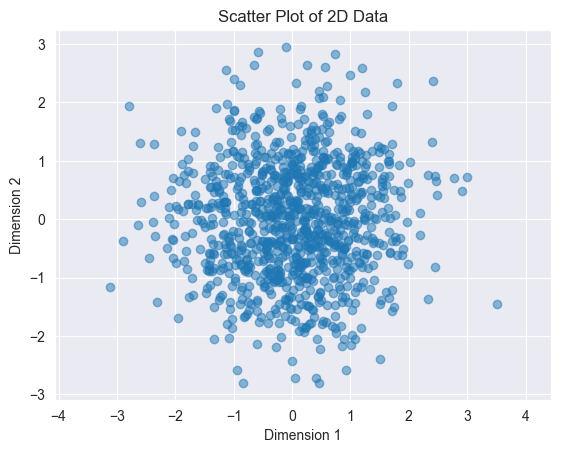

In [77]:
dimensions = 5

mean_vector = np.random.rand(dimensions) * 10
print(mean_vector)
A = np.random.rand(dimensions, dimensions)
cov_matrix = A @ A.T  # symmetric positive definite matrix
print(cov_matrix)


x = np.random.multivariate_normal(np.array([0] * dimensions), np.identity(dimensions), size=1000)
# plotam cele 2 dimensiuni ale lui x ca sa vedem ditributiile
plt.scatter(x[:, 0], x[:, 1], alpha=0.5)
plt.xlabel('Dimension 1')

plt.ylabel('Dimension 2')
plt.title('Scatter Plot of 2D Data')
plt.axis('equal')
plt.show()

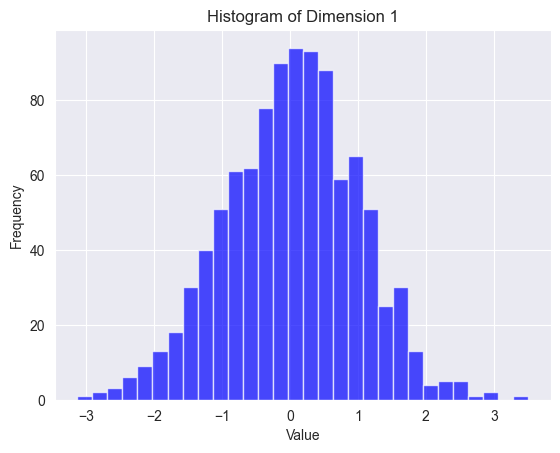

In [78]:
# plotam doar prima dimensiune
plt.hist(x[:, 0], bins=30, alpha=0.7, color='blue')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Dimension 1')
plt.show()

In [79]:
print(x.shape)

(1000, 5)


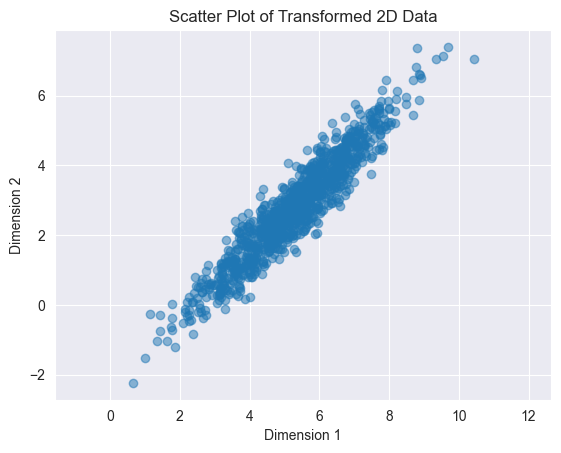

(1000, 5)


In [80]:
# cov matrix = L*L^T

L = np.linalg.cholesky(cov_matrix)
y = x @ L.T + mean_vector
plt.scatter(y[:, 0], y[:, 1], alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Scatter Plot of Transformed 2D Data')
plt.axis('equal')
plt.show()

print(y.shape)

In [81]:
mean_vector.shape

(5,)

In [82]:
z_scores2 = []
for sample in y:
    mean_diff = sample - mean_vector
    Y = np.linalg.solve(cov_matrix, mean_diff)
    sol = mean_diff.T @ Y
    z_scores2.append(np.sqrt(sol))

print(z_scores2)

[np.float64(3.948087975054633), np.float64(3.0954789493051496), np.float64(2.703136044643739), np.float64(2.9699530345932494), np.float64(1.746880131089692), np.float64(1.7681141031601737), np.float64(2.6677896900224187), np.float64(1.5799784686270462), np.float64(2.6015565886811403), np.float64(3.4122565325259693), np.float64(2.237762157428768), np.float64(3.4208830988600405), np.float64(3.238795439474566), np.float64(1.7430947842989235), np.float64(2.624120950925999), np.float64(2.5361858560718296), np.float64(2.7288627372052794), np.float64(2.4274094768530086), np.float64(2.394911649351446), np.float64(2.7558911072225056), np.float64(2.7049683350559324), np.float64(0.9939585997780234), np.float64(2.290562388784274), np.float64(2.0351469940572167), np.float64(3.4975262857088647), np.float64(2.446034120092037), np.float64(1.2237713482404877), np.float64(3.082115567339774), np.float64(1.2788939346494688), np.float64(1.6901774847714246), np.float64(1.4561500614127743), np.float64(2.2590

In [83]:
# metoda 2
z_scores3 = []
for sample in y:
    normalized_sample = sample - mean_vector
    Y = np.linalg.solve(L, normalized_sample)
    # norma lui Y
    sol = np.linalg.norm(Y)
    z_scores3.append(sol)

print(z_scores3)

[np.float64(3.948087975054629), np.float64(3.095478949305149), np.float64(2.7031360446437325), np.float64(2.9699530345932468), np.float64(1.7468801310896915), np.float64(1.7681141031601733), np.float64(2.667789690022416), np.float64(1.5799784686270466), np.float64(2.6015565886811403), np.float64(3.412256532525966), np.float64(2.237762157428767), np.float64(3.4208830988600387), np.float64(3.2387954394745657), np.float64(1.743094784298923), np.float64(2.624120950925998), np.float64(2.5361858560718264), np.float64(2.7288627372052785), np.float64(2.427409476853008), np.float64(2.394911649351442), np.float64(2.7558911072225056), np.float64(2.704968335055932), np.float64(0.9939585997780225), np.float64(2.2905623887842714), np.float64(2.035146994057215), np.float64(3.497526285708865), np.float64(2.446034120092037), np.float64(1.2237713482404868), np.float64(3.0821155673397707), np.float64(1.2788939346494683), np.float64(1.6901774847714248), np.float64(1.4561500614127738), np.float64(2.2590827

In [84]:
# comparam z_scores2 si z_scores3
import numpy as np
z_scores2 = np.array(z_scores2)
z_scores3 = np.array(z_scores3)
print(np.allclose(z_scores2, z_scores3))

True


In [85]:
# presupunem ca contamination = 0.1
threshold = np.quantile(z_scores2, 0.9)
predictions = (z_scores2 > threshold).astype(int)
predictions

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

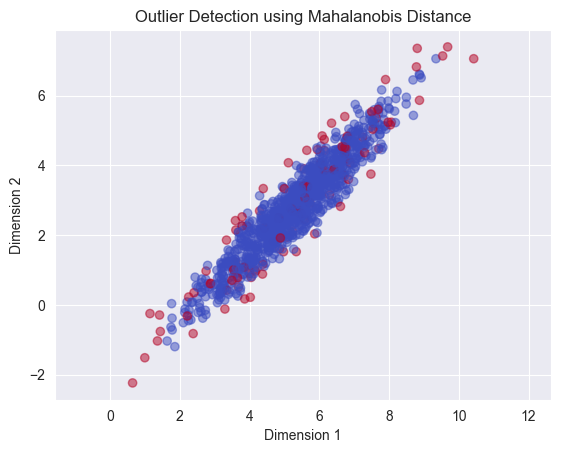

In [86]:
# plotam datele y in 2 culori, in functie de predictii
plt.scatter(y[:, 0], y[:, 1], c=predictions, cmap='coolwarm', alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Outlier Detection using Mahalanobis Distance')
plt.axis('equal')
plt.show()